In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

In [16]:
image_size = (299, 299)

In [17]:
model = keras.models.load_model('xception_v4_large_08_0.894.h5')

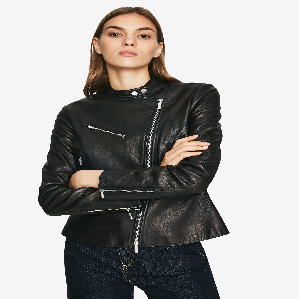

In [23]:
path = '/Users/nate/git/fashion-product-category-classification/images/ee380de1d2fa558bf7d0d493b0dd844b27ae74a5.jpg'
img = load_img(path, target_size=(image_size))
img

First, pre-process the image:

In [24]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

And get the prediction:

In [30]:
pred = model.predict(X)
pred[0]

array([ 3.6136947 , -3.0934613 ,  0.45029756,  4.793031  , -2.3253105 ,
       -0.8219224 , -0.513585  , -5.7293763 , -2.2012808 , -1.4332212 ],
      dtype=float32)

In [26]:
pred[0].argmax()

3

In [27]:
labels[pred[0].argmax()]

'outwear'

In [14]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "/Users/nate/git/clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [15]:
model.evaluate(test_ds)

12/12 [==============================] - 288s 24s/step - loss: 0.2464 - accuracy: 0.9032


[0.2463991902768612, 0.9032258]